<a href="https://colab.research.google.com/github/minhcong00/AI/blob/main/Nhan_Dang_10_MonAn_VN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/10VN_Dishes/10dishes_train/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('banhchung'):
    output = 0.0
  if file.startswith('banhmi'):
    output = 1.0
  if file.startswith('banhuot'):
    output = 2.0
  if file.startswith('banhxeo'):
    output = 3.0
  if file.startswith('bunbo'):
    output = 4.0
  if file.startswith('comsuon'):
    output = 5.0
  if file.startswith('goicuon'):
    output = 6.0
  if file.startswith('nemchua'):
    output = 7.0
  if file.startswith('nemran'):
    output = 8.0
  if file.startswith('thitkhotau'):
    output = 9.0

  photo = load_img(folder + file, target_size =(150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape, labels_train.shape)

(931, 150, 150, 3) (931,)


In [2]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/10VN_Dishes/10dishes_test/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('banhchung'):
    output = 0.0
  if file.startswith('banhmi'):
    output = 1.0
  if file.startswith('banhuot'):
    output = 2.0
  if file.startswith('banhxeo'):
    output = 3.0
  if file.startswith('bunbo'):
    output = 4.0
  if file.startswith('comsuon'):
    output = 5.0
  if file.startswith('goicuon'):
    output = 6.0
  if file.startswith('nemchua'):
    output = 7.0
  if file.startswith('nemran'):
    output = 8.0
  if file.startswith('thitkhotau'):
    output = 9.0
  photo = load_img(folder + file, target_size =(150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape, labels_test.shape)

(488, 150, 150, 3) (488,)


In [3]:
from keras.utils import  to_categorical

photos_train = photos_train.reshape(931, 150, 150, 3)
photos_train = photos_train.astype('float32')/255 
photos_test = photos_test.reshape(488, 150, 150, 3)
photos_test = photos_test.astype('float32')/255

labels_train = to_categorical(labels_train,10)
labels_test = to_categorical(labels_test,10)

print(photos_train.shape, labels_train.shape, photos_test.shape, labels_test.shape)

(931, 150, 150, 3) (931, 10) (488, 150, 150, 3) (488, 10)


In [4]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU

batch_size = 32
epochs = 50
classes = 10

model = Sequential()
#CNN
#tich chap 32 lan
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',input_shape = (150,150,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tich chap 64 lan
model.add(Conv2D(64, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tich chap 128 lan
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tich chap 512 lan
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tich chap 1024 lan
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#ANN
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation ='softmax'))
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                    

In [5]:
#compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy',metrics = ['accuracy'])
train = model.fit(photos_train, labels_train, batch_size = batch_size ,epochs = epochs, verbose = 1)
test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('Do chinh xac', test_acc)
print('Do mat mat', test_loss)

Epoch 1/50
30/30 [==============================] - 7s 89ms/step - loss: 2.5744 - accuracy: 0.1224
Epoch 2/50
30/30 [==============================] - 2s 54ms/step - loss: 2.2942 - accuracy: 0.1224
Epoch 3/50
30/30 [==============================] - 2s 54ms/step - loss: 2.0850 - accuracy: 0.2449
Epoch 4/50
30/30 [==============================] - 2s 55ms/step - loss: 1.9587 - accuracy: 0.2803
Epoch 5/50
30/30 [==============================] - 2s 54ms/step - loss: 1.7795 - accuracy: 0.3383
Epoch 6/50
30/30 [==============================] - 2s 54ms/step - loss: 1.6182 - accuracy: 0.4168
Epoch 7/50
30/30 [==============================] - 2s 54ms/step - loss: 1.6823 - accuracy: 0.3845
Epoch 8/50
30/30 [==============================] - 2s 54ms/step - loss: 1.4530 - accuracy: 0.4855
Epoch 9/50
30/30 [==============================] - 2s 54ms/step - loss: 1.2878 - accuracy: 0.5338
Epoch 10/50
30/30 [==============================] - 2s 54ms/step - loss: 1.2089 - accuracy: 0.5650
Epoch 11/

In [6]:
model.save('drive/MyDrive/10VN_Dishes/modelNhandang10MonAn.h5')

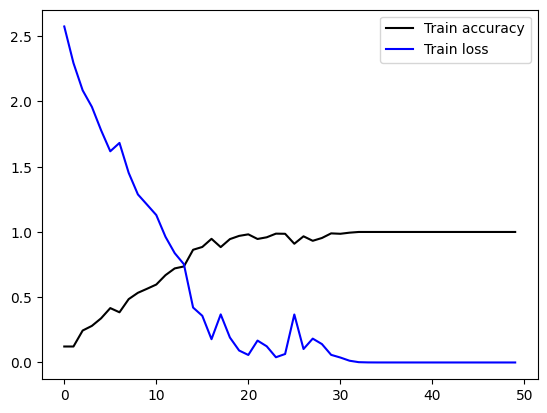

In [7]:
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'b', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

1/1 [==============================] - 0s 18ms/step
Giá trị: 3
1/1 [==============================] - 0s 19ms/step
banhxeo
1/1 [==============================] - 0s 19ms/step


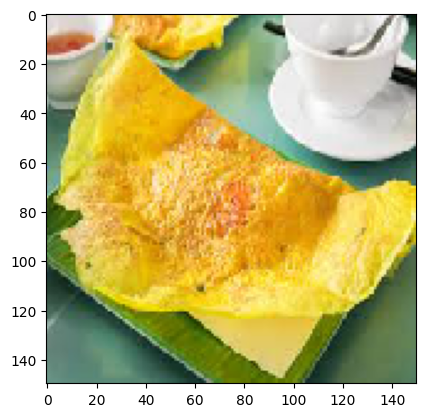

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/10VN_Dishes/banhxeo.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('banhchung')
if np.argmax(model.predict(img)) == 1:
   print('banhmi')
if np.argmax(model.predict(img)) == 2:
   print('banhuot')
if np.argmax(model.predict(img)) == 3:
   print('banhxeo')
if np.argmax(model.predict(img)) == 4:
   print('bunbo')
if np.argmax(model.predict(img)) == 5:
   print('comsuon')
if np.argmax(model.predict(img)) == 6:
   print('goicuon')
if np.argmax(model.predict(img)) == 7:
   print('nemchua')
if np.argmax(model.predict(img)) == 8:
   print('nemran')
if np.argmax(model.predict(img)) == 9:
   print('thitkhotau')

1/1 [==============================] - 0s 30ms/step
Giá trị: 0
1/1 [==============================] - 0s 37ms/step
banhchung
1/1 [==============================] - 0s 21ms/step


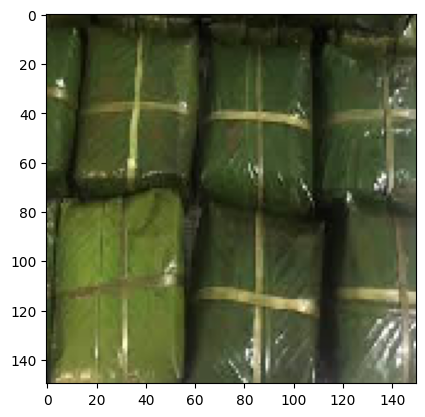

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/10VN_Dishes/banhchung.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('banhchung')
if np.argmax(model.predict(img)) == 1:
   print('banhmi')
if np.argmax(model.predict(img)) == 2:
   print('banhuot')
if np.argmax(model.predict(img)) == 3:
   print('banhxeo')
if np.argmax(model.predict(img)) == 4:
   print('bunbo')
if np.argmax(model.predict(img)) == 5:
   print('comsuon')
if np.argmax(model.predict(img)) == 6:
   print('goicuon')
if np.argmax(model.predict(img)) == 7:
   print('nemchua')
if np.argmax(model.predict(img)) == 8:
   print('nemran')
if np.argmax(model.predict(img)) == 9:
   print('thitkhotau')

1/1 [==============================] - 0s 27ms/step
Giá trị: 1
1/1 [==============================] - 0s 34ms/step
banhmi
1/1 [==============================] - 0s 28ms/step


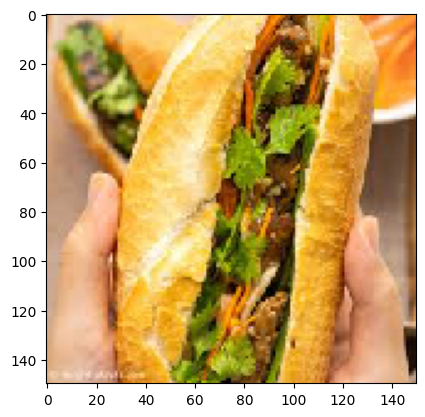

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/10VN_Dishes/banhmi151.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('banhchung')
if np.argmax(model.predict(img)) == 1:
   print('banhmi')
if np.argmax(model.predict(img)) == 2:
   print('banhuot')
if np.argmax(model.predict(img)) == 3:
   print('banhxeo')
if np.argmax(model.predict(img)) == 4:
   print('bunbo')
if np.argmax(model.predict(img)) == 5:
   print('comsuon')
if np.argmax(model.predict(img)) == 6:
   print('goicuon')
if np.argmax(model.predict(img)) == 7:
   print('nemchua')
if np.argmax(model.predict(img)) == 8:
   print('nemran')
if np.argmax(model.predict(img)) == 9:
   print('thitkhotau')